# ***K-Means Clustering***

## **Pengertian *K-Means Clustering***
**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang paling populer untuk melakukan clustering atau pengelompokan data. Tujuan dari algoritma ini adalah membagi sekumpulan data ke dalam beberapa kelompok (kluster) berdasarkan kemiripan atau kedekatan karakteristik.

## **Manfaat *K-Means Clustering***
**1. Segmentasi Pelanggan**

  Digunakan oleh perusahaan untuk mengelompokkan pelanggan berdasarkan perilaku, preferensi, atau pola pembelian. Hal ini membantu dalam menyusun strategi pemasaran yang lebih tepat sasaran.

**2. Pengelompokan Data Secara Otomatis**

  K-Means membantu dalam mengorganisasi dan menganalisis data besar dengan cara mengelompokkannya berdasarkan kemiripan tanpa perlu label atau klasifikasi sebelumnya.

**3. Analisis Citra dan Pengolahan Gambar**

  Digunakan dalam kompresi gambar dan segmentasi citra, misalnya memisahkan objek dari latar belakang dalam gambar berdasarkan warna atau tekstur.

**4. Deteksi Anomali**

  Membantu mengidentifikasi data yang tidak sesuai dengan pola umum dalam kluster, seperti mendeteksi transaksi mencurigakan dalam sistem keuangan.

**5. Pengelompokan Dokumen atau Teks**

  K-Means digunakan dalam pengolahan bahasa alami untuk mengelompokkan dokumen dengan topik atau tema yang serupa, contohnya dalam sistem rekomendasi berita.

**6. Optimalisasi Sistem Rekomendasi**

  Dengan mengetahui kelompok pengguna yang memiliki preferensi serupa, sistem bisa merekomendasikan produk atau konten yang lebih relevan.

**7. Pengambilan Keputusan yang Lebih Baik**

  Dengan informasi yang terkelompok secara logis, organisasi dapat membuat keputusan bisnis yang lebih cerdas dan berbasis data.

## **Langkah-langkah Umum K-Means:**
1. Tentukan jumlah kluster (k) yang diinginkan.

2. Pilih secara acak k buah centroid awal.

3. Kelompokkan setiap titik data ke kluster dengan centroid terdekat (berdasarkan jarak, misalnya Euclidean Distance).

4. Hitung ulang posisi centroid berdasarkan rata-rata posisi titik-titik dalam masing-masing kluster.

5. Ulangi langkah 3 dan 4 hingga posisi centroid tidak berubah secara signifikan atau jumlah iterasi maksimal tercapai.

## **Kesimpulan**
K-Means Clustering merupakan algoritma pengelompokan yang kuat dan efisien untuk menemukan struktur dalam data tanpa label. Meskipun sederhana, algoritma ini sangat berguna dalam banyak aplikasi dunia nyata. Namun, keberhasilannya sangat bergantung pada pemilihan jumlah kluster yang tepat dan distribusi data yang sesuai. Oleh karena itu, penting untuk melakukan evaluasi dan validasi saat menggunakan metode ini.


## **Inertia (Sum Square error/SSE)**

**Inertia atau Sum of Squared Error (SSE)** adalah metrik yang digunakan untuk mengukur seberapa baik data dalam sebuah kluster dikelompokkan oleh algoritma K-Means.

**Inertia didefinisikan sebagai:**

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**

Silhouette Analysis memberikan nilai koefisien Silhouette (Silhouette Coefficient) untuk setiap titik data, yang menunjukkan tingkat kesesuaian data tersebut terhadap kluster yang dimilikinya.
Nilai koefisien ini berada dalam rentang –1 hingga 1.

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


## **Library yang digunakan**

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## **Pengumpulan Data**

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3c7b065e-callistanovia6-e714.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_YS6MQk-gcL_QYbbL0BE",
        database="defaultdb",
        port=13412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irispostgre.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2785e5b5-mysqllpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_4dn925PyLTml8yy9MYL",
        database="irissql",
        port=10657
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

Kode diatas mengambil data dari dua database berbeda—PostgreSQL dan MySQL—menggunakan pustaka psycopg2 dan pymysql. Data dari masing-masing database diambil dalam bentuk DataFrame menggunakan query SQL. Kemudian, kedua DataFrame digabungkan menggunakan inner join berdasarkan kolom id dan class. Hasil penggabungan dicetak ke konsol tanpa menampilkan indeks baris.

## **Normalisasi Data dalam 2D**

**Normalisasi data** adalah proses mengubah skala nilai-nilai fitur dalam dataset agar berada dalam rentang tertentu, biasanya antara 0 dan 1. Tujuannya adalah agar seluruh fitur memiliki kontribusi yang seimbang dalam proses analisis atau pemodelan.

**Metode Umum Normalisasi:**

**1. Min-Max Scaling (Normalisasi)**

  Mengubah data ke dalam rentang [0, 1].

**2. Z-Score Standardization (Standarisasi)**

  Mengubah data menjadi memiliki mean = 0 dan standard deviation = 1.
  Cocok untuk PCA atau algoritma berbasis distribusi.

 **3. Robust Scaler**

Menggunakan median dan IQR (interquartile range).

Cocok untuk data yang memiliki outlier ekstrem.

**4. Max Abs Scaler**

Skala ke rentang [-1, 1] berdasarkan nilai absolut maksimum.

Berguna untuk data yang sparse (banyak nol).


## **Data Sebelum Normalisasi**

In [4]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal length  petal width  sepal length  sepal width
          1.4          0.2           5.1          3.5
         14.0          2.0          40.9         30.0
          1.3          0.2           4.7          3.2
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## **Visualisasi data**

## **Visualisasi PCA(Principal Component Analysis) untuk mengurangi jumlah dimensi**

**Principal Component Analysis (PCA)** adalah teknik reduksi dimensi yang digunakan untuk menyederhanakan dataset berdimensi tinggi menjadi dimensi yang lebih rendah tanpa kehilangan terlalu banyak informasi.

**Tujuan utama PCA:**
1. Mengurangi jumlah fitur dalam dataset.

2. Menjaga variansi data sebanyak mungkin (informasi penting).

3. Mendeteksi pola tersembunyi atau klaster dalam data.

4. Meningkatkan efisiensi model dan visualisasi data.

**Cara Kerja PCA:**

1. **Standarisasi data:** PCA bekerja optimal jika data distandarisasi (mean = 0, std = 1).

2. **Hitung kovarians antar fitur:** Untuk memahami hubungan antar fitur.

3. **Hitung eigenvector & eigenvalue:** Eigenvector menentukan arah, dan eigenvalue menunjukkan pentingnya arah tersebut (jumlah variansi).

4. **Pilih komponen utama:** Ambil beberapa eigenvector (disebut principal components) dengan nilai eigenvalue terbesar.

5. **Transformasi data:** Proyeksikan data asli ke ruang baru berdimensi lebih rendah.



## **Visualisasi data asli tanpa menggunakan PCA**

Ini Visualisasi data asli tanpa menggunakan PCA dalam bentuk 2 Dimensi

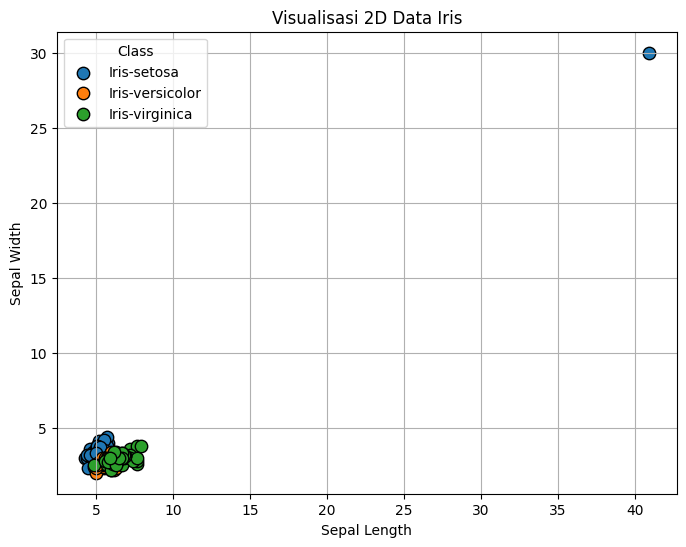

In [5]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini Visualisasi data asli tanpa menggunakan PCA dalam bentuk 3 Dimensi

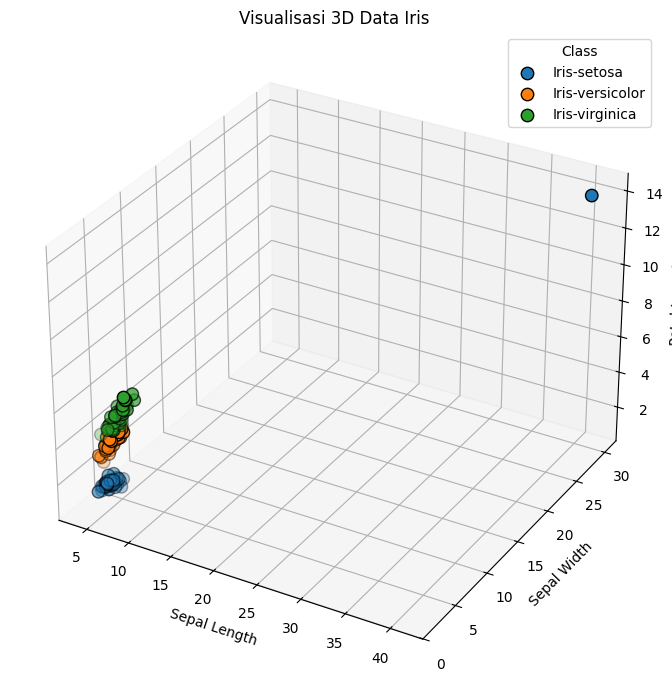

In [6]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## **Visualisasi data asli menggunakan PCA**

Ini Visualisasi data asli menggunakan PCA dengan bentuk 2 Dimensi

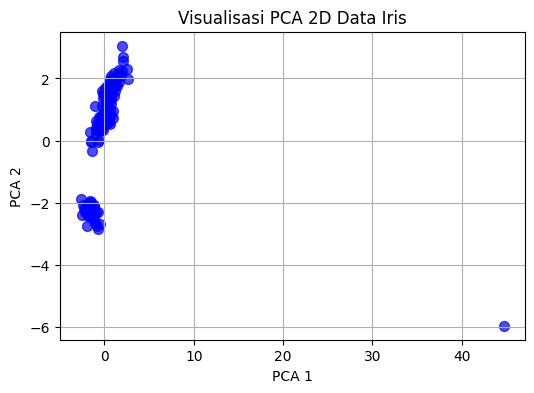

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini Visualisasi data asli menggunakan PCA dengan bentuk 2 Dimensi

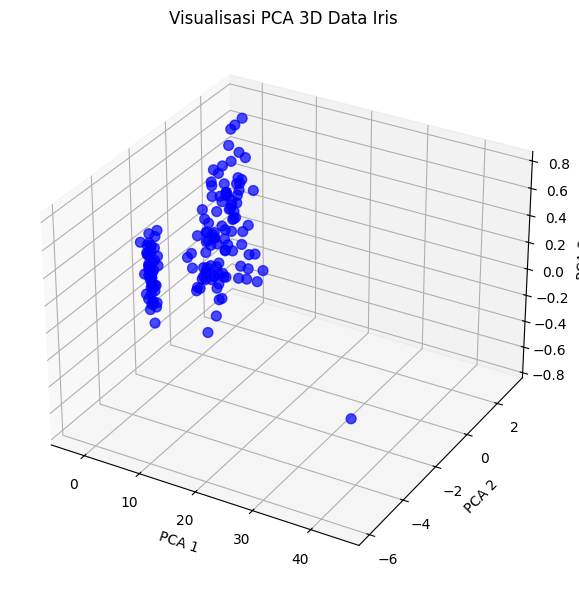

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Preprocessing dan Reduksi Dimensi**

### **Standarisasi dengan menggunakan MinMaxScaler**
Dalam proses ini, saya menerapkan normalisasi menggunakan MinMaxScaler sebagai langkah untuk menyeragamkan skala semua fitur dalam dataset. Hal ini menjadi penting karena fitur-fitur dalam data memiliki rentang nilai yang bervariasi, yang berpotensi memengaruhi kinerja algoritma machine learning, terutama yang bergantung pada perhitungan jarak seperti KNN dan SVM.

MinMaxScaler melakukan transformasi dengan mengonversi setiap nilai fitur ke dalam rentang antara 0 dan 1, berdasarkan nilai terkecil dan terbesar dari masing-masing fitur. Dengan skala yang seragam ini, algoritma dapat memperlakukan setiap fitur secara setara tanpa memprioritaskan fitur dengan nilai yang lebih tinggi.

Setelah normalisasi diterapkan, saya melihat bahwa model menjadi lebih konsisten dan kinerjanya meningkat. Dari pengalaman ini, saya menyadari bahwa proses normalisasi bukan hanya aspek teknis semata, tetapi juga bagian penting dari upaya menjaga kualitas serta keandalan data dalam proses pembelajaran mesin.

In [11]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Dalam kode dibawah ini, saya akan menampilkan data hasil standarisasi menggunakan MinMaxScaler

In [19]:
print (scaled_features);

[[0.03076923 0.04166667 0.02185792 0.05357143]
 [1.         0.79166667 1.         1.        ]
 [0.02307692 0.04166667 0.01092896 0.04285714]
 [0.03846154 0.04166667 0.00819672 0.03928571]
 [0.03076923 0.04166667 0.01912568 0.05714286]
 [0.05384615 0.125      0.03005464 0.06785714]
 [0.03076923 0.08333333 0.00819672 0.05      ]
 [0.03846154 0.04166667 0.01912568 0.05      ]
 [0.03076923 0.04166667 0.00273224 0.03214286]
 [0.03846154 0.         0.01639344 0.03928571]
 [0.03846154 0.04166667 0.03005464 0.06071429]
 [0.04615385 0.04166667 0.0136612  0.05      ]
 [0.03076923 0.         0.0136612  0.03571429]
 [0.00769231 0.         0.         0.03571429]
 [0.01538462 0.04166667 0.04098361 0.07142857]
 [0.03846154 0.125      0.03825137 0.08571429]
 [0.02307692 0.125      0.03005464 0.06785714]
 [0.03076923 0.08333333 0.02185792 0.05357143]
 [0.05384615 0.08333333 0.03825137 0.06428571]
 [0.03846154 0.08333333 0.02185792 0.06428571]
 [0.05384615 0.04166667 0.03005464 0.05      ]
 [0.03846154 

## **Clustering menggunakan K-Means**

### **Clustering dengan 2 cluster dan Visualisasi data**

Dalam kode dibawah ini, saya melakukan clustering menggunakan K-Means dengan 2 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering.

[2 Clusters] Inertia: 5.9851, Silhouette Score: 0.7015


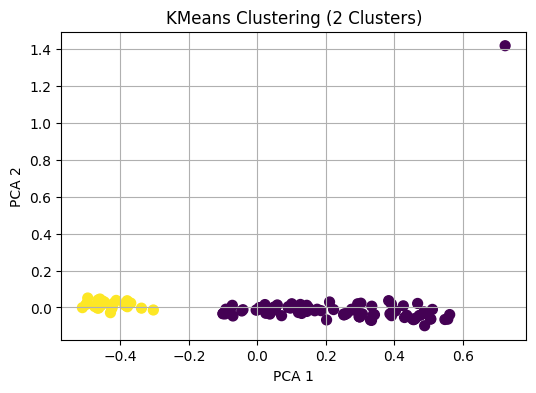

In [13]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Lalu untuk kode dibawah ini, saya akan lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 5.9851, Silhouette Score: 0.7015


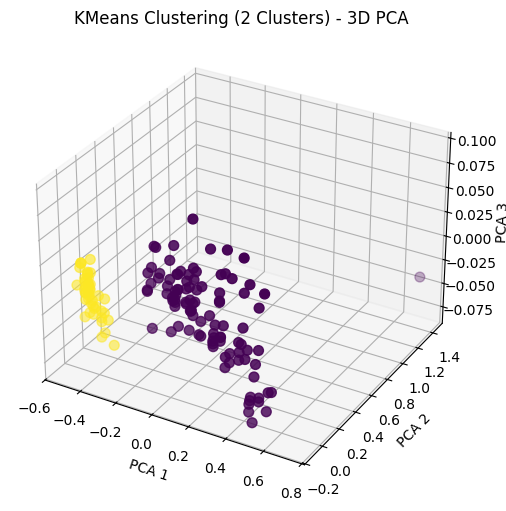

In [14]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### **Clustering dengan 3 cluster dan Visualisasi data**

Dalam kode dibawah ini, saya melakukan clustering menggunakan K-Means dengan 3 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.2684, Silhouette Score: 0.6620


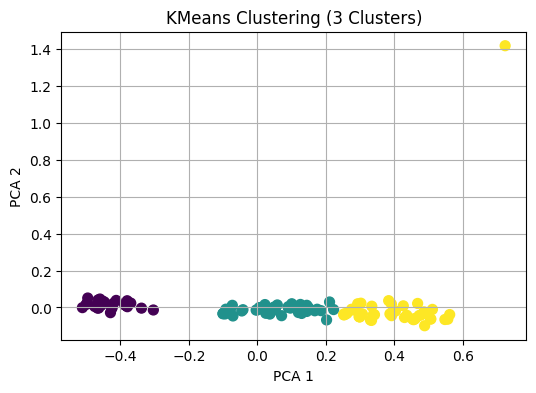

In [15]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Lalu untuk kode dibawah ini, saya akan lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.2684, Silhouette Score: 0.6620


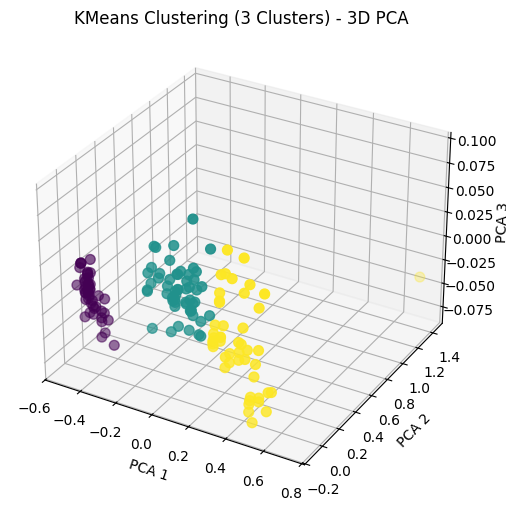

In [16]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### **Clustering dengan 4 cluster dan Visualisasi data**

Dalam kode dibawah ini, saya melakukan clustering menggunakan K-Means dengan 4 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 1.0883, Silhouette Score: 0.6821


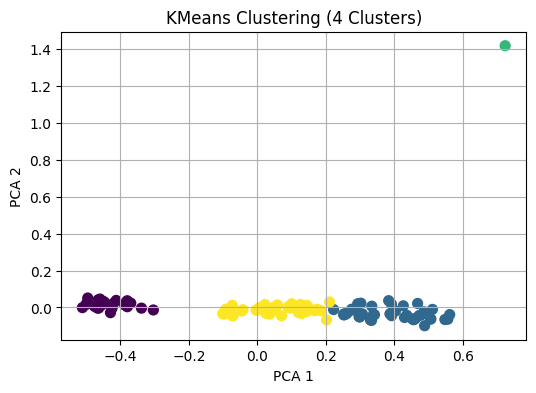

In [17]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 1.0883, Silhouette Score: 0.6821


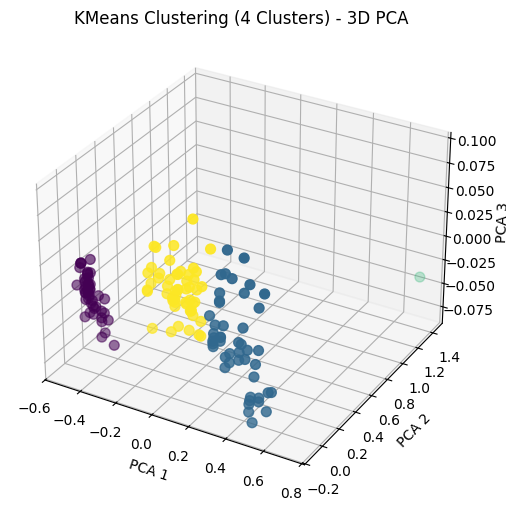

In [18]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
